# **Exercise 2:**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import math

In [2]:
#we will load the iris data from scikit-learn package
iris = load_iris()

In [3]:
#check the shape of iris data
print(iris.data.shape)
A=iris.data

(150, 4)


In [4]:
#check the shape of iris target
print(iris.target.shape)

(150,)


In [5]:
#How many labels does iris data have?
#C=num of classes
#print(C)

classes = np.unique(iris.target)
C = len(classes)

print("Number of classes:", C)
print("Classes:", classes)

Number of classes: 3
Classes: [0 1 2]


In [6]:
n = iris.data.shape[0]         #Number of data points
d = iris.data.shape[1]         #Dimension of data points

In [7]:
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])

for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1

In [8]:
print(y)

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]

In [9]:
# Create an index array
indexarr = np.arange(n)        ## index array
np.random.seed(1000)
np.random.shuffle(indexarr)    ## shuffle the indices
print(indexarr) #check indexarr after shuffling

[ 95  34 127 120  24  28  84  68  38 123 132  74  44   4 144  67 119  82
  37  49  81  70 125 141  57  15  85  97  60 137  23  62 143  64  39 108
 111  66 101 102 126 148 115  91 121 106 142 112  76   3  33   8  98 122
 138  83 131 147  93  78  96  22 103  99 124 140  80  86   9 136  19  63
  13  73  90  48 117  25  65  20  56 104  53  51  35  10   6  41 133  77
   2 110  72 134  55   5  12 107  29  54 130  17  79 118  47  27  46 129
 145  18 109 135  31   0  59 113  43 139 149 116  16   7 100  26  21  50
  52  32  75  11  69  61  14 114  88  30  58  42  36 146 105  40  45  89
 128   1  92  94  71  87]


In [10]:
# Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
split = int(0.8*len(indexarr))

train_data = np.array([iris.data[i] for i in indexarr[:split]])
train_label = np.array([y[i] for i in indexarr[:split]])
test_data = np.array([iris.data[i] for i in indexarr[split:]])
test_label = np.array([y[i] for i in indexarr[split:]])

n1 = train_data.shape[0]

In [11]:
def predict(w, x):
    return np.sign(np.dot(w.T, x))

In [12]:
def compute_accuracy(data, label, w):
    count = 0
    for i in range(data.shape[0]):
        if label[i,:] == predict(w, data[i,:]):
            count = count + 1
    acc = count*100/data.shape[0]
    return acc

### Answer 1)

An appropriate choice of $f_i(w)$ is:
\begin{align}
f_i(w) &= \frac{\lambda}{2n}\|w\|_2^2 + \frac{1}{n} L(y_i,w^Tx_i)\\
&= \frac{\lambda}{2n}\sum_{j=1}^{d}w_j^2 + \frac{1}{n} L(y_i,w^Tx_i)
\end{align}
where $d$ = number of features in the data set

### Answer 2)

In [13]:
def compute_loss_h(w,x,y):
    return max(0, 1 - y*np.dot(w.T,x))

In [14]:
def compute_loss_l(w,x,y):
    return math.log(1+math.exp(-y*np.dot(w.T,x)))

In [15]:
def compute_loss_sh(w,x,y):
    return (max(0, 1 - y*np.dot(w.T,x)))**2

Answer 3)

In [16]:
def compute_objfnval(data, label, model_w, lambda_val):
    f_val = 0
    term_1 = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(label)
    for data_pt, label in zip(data, label):
        term_2 = compute_loss_h(model_w, data_pt, label)
        f_val = f_val + term_2
    
    return term_1 + (f_val/n)

In [17]:
def compute_objfnval_l(data, labels, model_w, lamda):
    fnval = 0
    term_1 = 0.5*lamda*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for i in range(len(data)):
        term_2 = compute_loss_l(model_w, data[i], labels[i])
        fnval = fnval + term_2
    
    return term_1 + (fnval/n)

In [18]:
def compute_objfnval_sh(data, labels, model_w, lamda):
    fnval = 0
    term_1 = (0.5)*lamda*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for i in range(len(data)): 
        term_2 = compute_loss_sh(model_w, data[i], labels[i])
        fnval = fnval + term_2
    
    return term_1 + (fnval/n)

Answer 4)

### Gradient computation:
- For Hinge loss: 
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}(\lambda\ w_k -y\ x_{ik}) &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}  


- For Logistic loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} = \frac{\lambda\ w_k}{n} + \frac{1}{1+exp(-y\ w^T x_{ik})}exp(-y\ w^T x_{ik})(-y\ x_{ik})
\end{align}

- For Squared Hinge loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}[\lambda\ w_k -2(1-y\ w^T x_{ik})\ y\ x_{ik}] &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}

In [19]:
def compute_grad_loss_h(x,y,model_w, lamda):

    grad = np.zeros([model_w.shape[0],1])
    n = len(y)
    for i in range(model_w.shape[0]):
        a = 1 - (y*np.dot(model_w.T, x)) 
        if a <= 0:
            grad[i] = (lamda*model_w[i])
        else:
            grad[i] = (lamda*model_w[i]) - (1/n)*y*x[i]
    
    return np.multiply(grad, 1)

In [20]:
def compute_grad_loss_l(x,y,model_w, lamda):

    grad = np.zeros([model_w.shape[0],1])
    n = len(y)
    for i in range(model_w.shape[0]):
      grad[i] = (lamda*model_w[i]) + (1/n)*(math.exp(-y*np.dot(model_w.T, x)))*(1/(1+math.exp(-y*np.dot(model_w.T, x))))*y*x[i]
    
    return np.multiply(grad, 1)

In [21]:
def compute_grad_loss_sh(x,y,model_w, lamda):

    grad = np.zeros([model_w.shape[0],1])
    n = len(y)
    for i in range(model_w.shape[0]):
        a = 1 - int(y*np.dot(model_w.T, x)) 
        if a <= 0:
            grad[i] = (lamda*model_w[i])
        else:
            grad[i] = (lamda*model_w[i]) - (2/n)*(1-y*np.dot(model_w.T, x))*y*x[i]
    
    return np.multiply(grad, 1)

Answer 5)

In [22]:
def OPT1(data,labels,lamda, num_epochs):
    t = 1
    np.random.seed(1000)
    w_old = np.random.rand(data.shape[1],1)
    func_val_l = []
    accuracy_test=[]
    accuracy_train=[]
    weights = []
    array = np.arange(data.shape[0])
    for epoch in range(num_epochs):
      np.random.seed(1000)
      np.random.shuffle(array) 
      for i in np.nditer(array): 
        step = 1/t
        g_i = compute_grad_loss_h(data[i,:], labels[i,:], w_old, lamda)
        w_new = np.subtract(w_old, np.multiply(step, g_i))
        w_old=w_new
        t = t+1
        if t>1e4:
          t=1
      
      func_val_l.append(compute_objfnval(data, labels, w_new, lamda))
      accuracy_train.append(compute_accuracy(data, labels, w_new))
      accuracy_test.append(compute_accuracy(test_data, test_label, w_new))
      weights.append(w_new)
    return w_new, func_val_l, accuracy_train,accuracy_test

### Answer 6a)

In [23]:
lam=[1e-3,1e-2,1e-1,1,10]
num_epochs = 1000
w_opt = {}
func_val_epochs=[]
accuracy_test_epochs=[]
accuracy_train_epochs=[]

for i in range(len(lam)):
  w_opt, func_val_1, accuracy_train,accuracy_test = OPT1(train_data, train_label, lam[i], num_epochs)
  func_val_epochs.append(func_val_1)
  accuracy_test_epochs.append(accuracy_test)
  accuracy_train_epochs.append(accuracy_train)
  print("Lambda:", lam[i])
  print('Test Accuracy:',compute_accuracy(test_data, test_label, w_opt))
  print('Train Accuracy:',compute_accuracy(train_data, train_label, w_opt))
  print('\n')

Lambda: 0.001
Test Accuracy: 76.66666666666667
Train Accuracy: 71.66666666666667


Lambda: 0.01
Test Accuracy: 63.333333333333336
Train Accuracy: 66.66666666666667


Lambda: 0.1
Test Accuracy: 60.0
Train Accuracy: 68.33333333333333


Lambda: 1
Test Accuracy: 60.0
Train Accuracy: 68.33333333333333


Lambda: 10
Test Accuracy: 60.0
Train Accuracy: 68.33333333333333




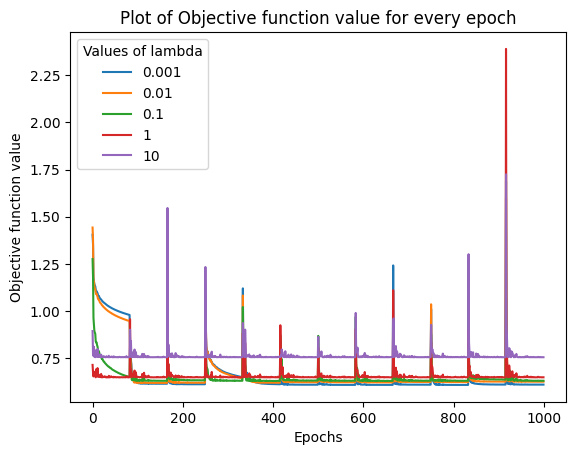

In [24]:
for i in range(len(lam)):
  plt.plot(func_val_epochs[i])
  plt.legend([1e-3,1e-2,1e-1,1,10], title = "Values of lambda")
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Plot of Objective function value for every epoch")
plt.show()

### Answer 6b)

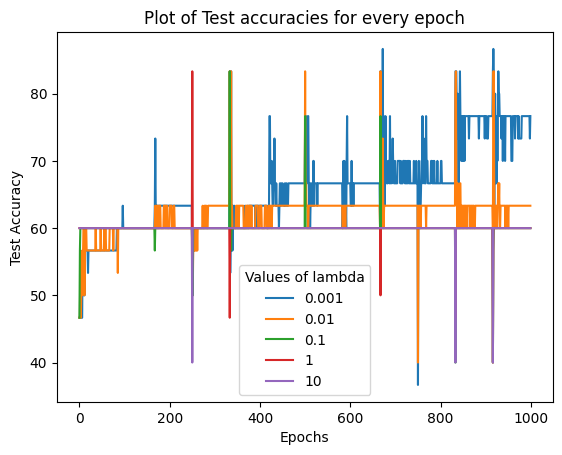

In [25]:
for i in range(len(lam)):
  plt.plot(accuracy_test_epochs[i])
  plt.legend([1e-3,1e-2,1e-1,1,10], title = "Values of lambda")
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title("Plot of Test accuracies for every epoch")
plt.show()

### Answer 6c)

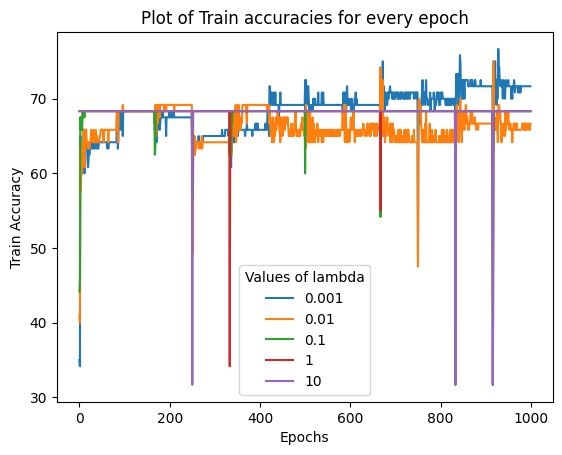

In [26]:
for i in range(len(lam)):
  plt.plot(accuracy_train_epochs[i])
  plt.legend([1e-3,1e-2,1e-1,1,10], title = "Values of lambda")
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title("Plot of Train accuracies for every epoch")
plt.show()

### Answer 6d)

\\
\begin{array}{|c|c|c|c|}\hline\\
\ \textbf{Lambda Values} &  \textbf{Final Test Accuracy}&\textbf{Final Train Accuracy} \\ \hline\\
0.001 & 76.66 & 71.66\\ \hline
0.01 & 63.33 & 66.66 \\ \hline
0.1 & 60.00 & 68.33 \\ \hline
1 & 60.00 & 68.33 \\ \hline
10 & 60.00 & 68.33\\ \hline
\end{array}

 \\

Answer 6e) 

Observations: As lambda value increases, final test accuracy decreases then remains same from lambda = 0.1 but final train accuracy decreases from lambda = 0.001 to 0.01 and then increases from lambda = 0.001 to 0.01 and then it remains same.

### Answer 7)

We propose the norm of difference of $w_{k}$ and $w_{k-1}$ for every iteration $k$ as the stopping criterion, i.e. we stop at iteration $k$ if $\|w_{k}- w_{k-1} < \epsilon\|$ for some $\epsilon$. We choose $\epsilon = 10^{-5}$ in our algorithm. 

In [27]:
def OPT1_STOP(data,labels,lamda,num_epochs):
    t = 1
    np.random.seed(1000)
    w_old = np.random.randn(data.shape[1],1)
    func_val_h = []
    accuracy_test=[]
    accuracy_train=[]
    weights = []
    array = np.arange(data.shape[0])
    step = 1/t
    g_i = compute_grad_loss_h(data[0,:], labels[0,:], w_old, lamda)
    w_new = np.subtract(w_old, np.multiply(step, g_i))
    while np.linalg.norm(w_new-w_old)>10**(-5):
      np.random.seed(1000)
      np.random.shuffle(array) 
      for i in np.nditer(array): 
        step = 1/t
        g_i = compute_grad_loss_h(data[i,:], labels[i,:], w_old, lamda)
        w_new = np.subtract(w_old, np.multiply(step, g_i))
        w_old=w_new
        t = t+1
        if t>1e4:
          t=1
      
      func_val_h.append(compute_objfnval(data, labels, w_new, lamda))
      accuracy_train.append(compute_accuracy(data, labels, w_new))
      accuracy_test.append(compute_accuracy(test_data, test_label, w_new))
      weights.append(w_new)
    return w_new, func_val_h, accuracy_train,accuracy_test

One value of lambda which gave best test accuracy are 0.001.

In [28]:
lamb=0.001
num_epochs = 1000
w_opt = {}
w_opt_h, func_val_h, accuracy_train,accuracy_test = OPT1_STOP(train_data, train_label, lamb, num_epochs)
print('Test Accuracy:',compute_accuracy(test_data, test_label, w_opt_h))
print('Train Accuracy:',compute_accuracy(train_data, train_label, w_opt_h))

Test Accuracy: 50.0
Train Accuracy: 51.666666666666664


### Answer 8)

In [29]:
def OPT2_STOP(data,labels,lamda, num_epochs):
    t = 1
    np.random.seed(1000)
    w_old = np.random.randn(data.shape[1],1)
    func_val_l = []
    accuracy_test=[]
    accuracy_train=[]
    weights = []
    array = np.arange(data.shape[0])
    step = 1/t
    g_i = compute_grad_loss_l(data[0,:], labels[0,:], w_old, lamda)
    w_new = np.subtract(w_old, np.multiply(step, g_i))
    while np.linalg.norm(w_new-w_old)>10**(-5):
      np.random.seed(1000)
      np.random.shuffle(array) 
      for i in np.nditer(array): 
        step = 1/t
        g_i = compute_grad_loss_l(data[i,:], labels[i,:], w_old, lamda)
        w_new = np.subtract(w_old, np.multiply(step, g_i))
        w_old=w_new
        t = t+1
        if t>1e4:
          t=1
      
      func_val_1.append(compute_objfnval_l(data, labels, w_new, lamda))
      accuracy_train.append(compute_accuracy(data, labels, w_new))
      accuracy_test.append(compute_accuracy(test_data, test_label, w_new))
      weights.append(w_new)
    return w_new, func_val_l, accuracy_train,accuracy_test

In [30]:
lam=[1e-3,1e-2,1e-1,1,10]
num_epochs = 1000
w_opt = {}
func_val_epochs=[]
accuracy_test_epochs=[]
accuracy_train_epochs=[]



for i in range(len(lam)):
  w_opt_l, func_val_l, accuracy_train, accuracy_test = OPT2_STOP(train_data, train_label, lam[i], num_epochs)
  func_val_epochs.append(func_val_l)
  accuracy_test_epochs.append(accuracy_test)
  accuracy_train_epochs.append(accuracy_train)
  print("Lambda:", lam[i])
  print('Test Accuracy:',compute_accuracy(test_data, test_label, w_opt_l))
  print('Train Accuracy:',compute_accuracy(train_data, train_label, w_opt_l))
  print('\n')

Lambda: 0.001
Test Accuracy: 40.0
Train Accuracy: 31.666666666666668


Lambda: 0.01
Test Accuracy: 40.0
Train Accuracy: 31.666666666666668


Lambda: 0.1
Test Accuracy: 40.0
Train Accuracy: 31.666666666666668


Lambda: 1
Test Accuracy: 40.0
Train Accuracy: 31.666666666666668


Lambda: 10
Test Accuracy: 40.0
Train Accuracy: 31.666666666666668




In [31]:
def OPT3_STOP(data,labels,lamda, num_epochs):
    t = 1
    np.random.seed(1000)
    w_old = np.random.randn(data.shape[1],1)
    func_val_sh = []
    accuracy_test=[]
    accuracy_train=[]
    weights = []
    array = np.arange(data.shape[0])
    step = 1/t
    g_i = compute_grad_loss_sh(data[0,:], labels[0,:], w_old, lamda)
    w_new = np.subtract(w_old, np.multiply(step, g_i))
    while np.linalg.norm(w_new-w_old)>10**(-5):
      np.random.seed(1000)
      np.random.shuffle(array) 
      for i in np.nditer(array): 
        step = 1/t
        g_i = compute_grad_loss_sh(data[i,:], labels[i,:], w_old, lamda)
        w_new = np.subtract(w_old, np.multiply(step, g_i))
        w_old=w_new
        t = t+1
        if t>1e4:
          t=1
      
      func_val_sh.append(compute_objfnval_sh(data, labels, w_new, lamda))
      accuracy_train.append(compute_accuracy(data, labels, w_new))
      accuracy_test.append(compute_accuracy(test_data, test_label, w_new))
      weights.append(w_new)
    return w_new, func_val_sh, accuracy_train,accuracy_test

In [32]:
lam=[1e-3,1e-2,1e-1,1,10]
num_epochs = 1000
w_opt = {}
func_val_epochs=[]
accuracy_test_epochs=[]
accuracy_train_epochs=[]



for i in range(len(lam)):
  w_opt_sh, func_val_sh, accuracy_train, accuracy_test = OPT3_STOP(train_data, train_label, lam[i], num_epochs)
  func_val_epochs.append(func_val_sh)
  accuracy_test_epochs.append(accuracy_test)
  accuracy_train_epochs.append(accuracy_train)
  print("Lambda:", lam[i])
  print('Test Accuracy:',compute_accuracy(test_data, test_label, w_opt_sh))
  print('Train Accuracy:',compute_accuracy(train_data, train_label, w_opt_sh))
  print('\n')

Lambda: 0.001
Test Accuracy: 50.0
Train Accuracy: 45.0


Lambda: 0.01
Test Accuracy: 50.0
Train Accuracy: 45.0


Lambda: 0.1
Test Accuracy: 50.0
Train Accuracy: 45.0


Lambda: 1
Test Accuracy: 50.0
Train Accuracy: 44.166666666666664


Lambda: 10
Test Accuracy: 66.66666666666667
Train Accuracy: 49.166666666666664




###Observations: 

- Regarding test accuracies:
> - Squared hinge loss has higher test accuracy than logistic loss for all values of lambda.
- Regarding train accuracies:
> - Squared hinge loss has higher train accuracy than logistic loss for all values of lambda.